<h1>Analizando el conjunto de datos de la flor Iris</h1>

Tenemos un conjunto de datos de la flor Iris la cuál tiene diversas especies (Setoda, Versicolor, etc).

En el conjunto de datos tendremos 4 características:
* Longitud del sépalo
* Anchura del sépalo
* Longitud del pétalo
* Anchura del pétalo

Haremos primeramente un perceptron para entrenar y clasificar las diferentes especies de flores de Iris.

Repasaremos primero como funciona una neurona. 
![alt text](http://webspace.ship.edu/cgboer/neuronesp.gif)

La neurona recibe un señales eléctricas que llegan a las dendrites. Estas señales son entonces integradas en el cuerpo de la célula, y si las señales acumuladas exceden un cierto umbral, una señal de salida será generada, la cuál será transmitida por el axón. 

Hace unos pocos años, Frank Rosenblatt publicó el primer concepto de regla de aprendizaje de perceptron basado en el modelo de neurona MCP. Con esta regla perceptron, Rosenblatt propusó un algoritmo que automáticamente aprendería los coeficientes de peso que es multiplicado por la entrada para saber si la neurona envia la señal, es decir, si sobrepasa el umbral.

Nos basaremos un algoritmo de <strong>aprendizaje supervisado</strong>, es decir, a partir de muchas muestras entrenaremos a nuestro algoritmo de tal manera que sea capaz de predecir que especie de flor de Iris le estoy proporcionando sin saber explicitamente a que especie pertenece.



De momento nos centraremos en que solo hay dos especies de flor Iris por lo tanto es un problema de clasificación binaria dónde tendremos dos clases, "1 - clase positiva" y "-1 - clase negativa). Definiremos una función de activación φ(z), que combinara el valor de la entrada con la de los pesos, y nos dará una de las dos clases ya mencionadas.

Si la salida de nuestra función de activación, es mayor que nuestro umbral θ (que habremos definido previamente), entonces la clase será 1, de lo contrario será -1. En el perceptron la función de activación es un único paso.

Ahora implementaremos la clase perceptron, la cuál tendrá dos métodos principales que son el método fit y el método predict.


In [1]:
import numpy as np
class Perceptron(object):
    """Perceptron classifier.
    Parámetros
    ---------
    eta: float
        Learning rate (entre 0.0 y 1.0)
    n_iter: int
        Pasos sobre el training dataset
    
    Atributos
    ---------
    w_: 1d-array
        Pesos después de fitting
    errors_: list
        Número de clasificaciones erroneas en cada epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fir training data.
        
        Parámetros
        ----------
        X: {array-like}, shape = [n_samples, n_features]
        Training vectors, dónde n_samples es el número de muestras 
        y n_features es el número de características
        
        y: array-like, shape = [n_samples]
            Valores objetivo
            
        Returns
        -------
        self: object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label después unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Ahora podemos inicializar nuestro percetron utilizando un rango de aprendizaje que le propocionaremos que es la variable eta y el número de epochs (pasos sobre el conjunto de entrenamiento) el cuál es la variable n_iter. Mediante el método fit, inicializaremos los pesos en el vector self.w_. 

Para probar nuestra implementación de perceptron, cargarémos dos clases de fores, Setoda y Versicolor del conjunto de datos de Iris. Aunque la regla perceptron no está restringida a dos dimensiones, únicamente consideramos las dos características de longitud de sépalo y longitud de pétalo para propositos de visualización. Aunque solo utilizamos dos clases de flores, el perceptron puede ser extendido a clasificación de multiples clases.

Ahora obtendremos las flores:


In [5]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)


In [6]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Extraemos las primeras 100 muestras de flores, 50 Iris-Setosa y 50 Iris-Versicolor respectivamente.

In [4]:
#Queremos los primeros 100 y solo la columna 4
y = df.iloc[0:100, 4]
print (y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
           ...       
70    Iris-versicolor
71    Iris-versicolor
72    Iris-versicolor
73    Iris-versicolor
74    Iris-versicolor
75    Iris-versicolor
76    Iris-versicolor
77    Iris-versicolor
78    Iris-versicolor
79    Iris-versicolor
80    Iris-versicolor
81    Iris-versicolor
82    Iris-versicolor
83    Iris-versicolor
84    Iris

Convertiremos las primeras 100 muestras a 1(Iris-Versicolor) y -1 (Iris-Setosa). 

In [10]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
print (y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


Ahora entrenamos nuestro perceptron y mostramos los resultados:

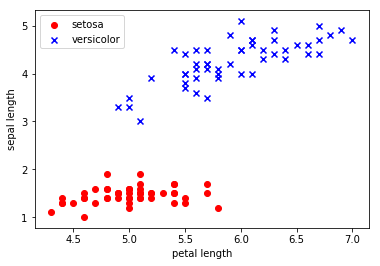

In [13]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

Ahora miraremos el número de pasos hasta comprobar si el algoritmo converge y encuentra un límite de decisión que separa las dos clases:

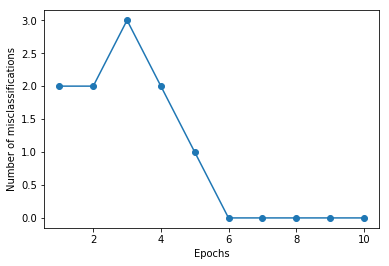

In [15]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()